<a href="https://colab.research.google.com/github/alouwyck/vives-deep-learning/blob/main/topic7/Chollet_HFST7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

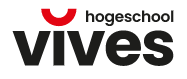<br>


**DEEP LEARNING**<br>
Academiejaar 2022-2023<br>
Andy Louwyck

---



---



# HFST 7: Working with Keras - a deep dive

Import statements

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.datasets import mnist

## 7.2. Different ways to build Keras models

### 7.2.1. The Sequential Model

List van layers doorgeven aan constructor:

In [ ]:
model = keras.Sequential([
    layers.Dense(64, 'relu'),
    layers.Dense(10, 'softmax')
])

In [ ]:
#model.build()  # lukt niet want input_shape nodig voor het initialiseren van de gewichten!
model.build(input_shape=(None, 3))

In [ ]:
model.summary()  # lukt enkel als model is geconstrueerd met methode build()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Kan je het aantal parameters verklaren?

Met methode `add()` werken:

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(64, 'relu'))
model.add(layers.Dense(10, 'softmax'))

In [ ]:
model.build(input_shape=(None, 3))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Input layer direct meegeven:

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(3,)),  # waarom (3,) en niet gewoon 3??
    layers.Dense(64, 'relu'),
    layers.Dense(10, 'softmax')
])
model.build()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model = keras.Sequential(name="Model")
model.add(layers.Input(shape=(3,), name="Input"))
model.add(layers.Dense(units=64, activation='relu', name="Hidden"))
model.add(layers.Dense(units=10, activation='softmax', name="Output"))
model.build()
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden (Dense)              (None, 64)                256       
                                                                 
 Output (Dense)              (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 7.2.2. The functional API

Previous example with functional API:

In [ ]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
for tensor in [inputs, features, outputs]:
    print(tensor.shape)  # symbolic tensors! bevatten nog geen data!
    print(tensor.dtype)

(None, 3)
<dtype: 'float32'>
(None, 64)
<dtype: 'float32'>
(None, 10)
<dtype: 'float32'>


Multi-input multi-output example: customer support tickets

In [ ]:
# the model

vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(num_departments, activation="softmax", name="department")(features)

model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department]
)

In [ ]:
# the (random) data

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

Model compileren, trainen en evalueren:

met lists - volgorde belangrijk!

In [ ]:
model.compile(
    optimizer="rmsprop",
    loss=["mean_squared_error", "categorical_crossentropy"],
    metrics=[["mean_absolute_error"], ["accuracy"]]
)

model.fit(
    [title_data, text_body_data, tags_data],  # volgorde belangrijk!
    [priority_data, department_data],  # volgorde belangrijk!
    epochs=1
)

model.evaluate(
    [title_data, text_body_data, tags_data],  # volgorde belangrijk!
    [priority_data, department_data]  # volgorde belangrijk!
)

priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])  # volgorde belangrijk!

40/40 [==============================] - 0s 4ms/step


met dicts - volgorde niet belangrijk!

In [ ]:
model.compile(
    optimizer="rmsprop",
    loss={"priority": "mean_squared_error", "department":"categorical_crossentropy"},
    metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]}
)

model.fit(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    {"priority": priority_data, "department": department_data},
    epochs=1
)

model.evaluate(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    {"priority": priority_data, "department": department_data}
)

priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)

40/40 [==============================] - 0s 4ms/step


Model plotten:

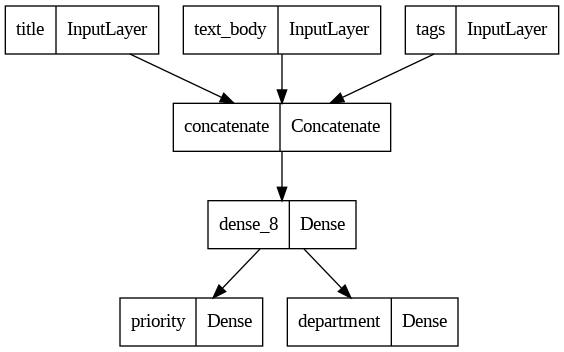

In [ ]:
#keras.utils.plot_model(model, "ticket_classifier.png")
keras.utils.plot_model(model)

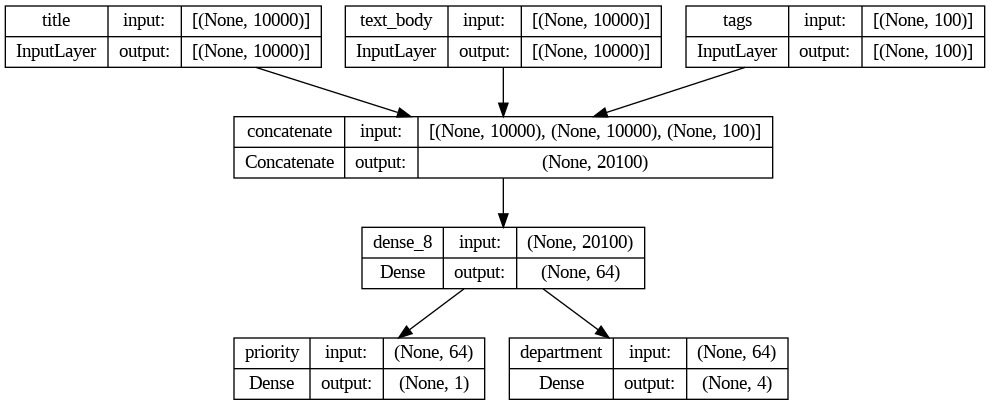

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

Layers opvragen:

In [ ]:
model.layers  # list

Layer input en output opvragen:

In [ ]:
print(model.layers[4].input)
print(model.layers[4].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 20100), dtype=tf.float32, name=None), name='concatenate/concat:0', description="created by layer 'concatenate'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='dense_8/Relu:0', description="created by layer 'dense_8'")


Model uitbreiden:

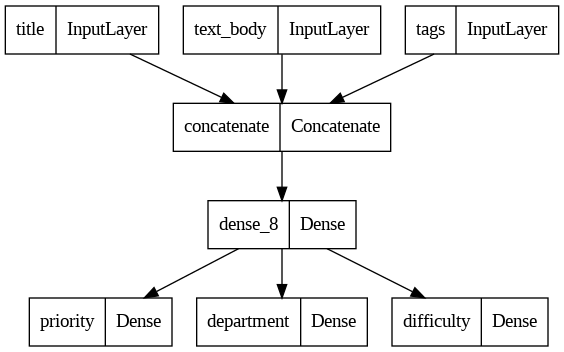

In [ ]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)  # 3 categorieën

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty]
)

keras.utils.plot_model(new_model)

### 7.2.3. Subclassing the `Model` class

In [ ]:
class CustomerTicketModel(keras.Model):  # erft van keras.Model!

    def __init__(self, num_departments):
        super().__init__()  # niet vergeten!
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
        num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]
        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [ ]:
model = CustomerTicketModel(num_departments=4)
priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)  # roept method call() aan

In [ ]:
# erft methoden compile(), fit(), evaluate(), predict()

model.compile(
    optimizer="rmsprop",
    loss=["mean_squared_error", "categorical_crossentropy"],
    metrics=[["mean_absolute_error"], ["accuracy"]]
)

model.fit(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    [priority_data, department_data],
    epochs=1
)

model.evaluate(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    [priority_data, department_data]
)

priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)

40/40 [==============================] - 0s 5ms/step


## 7.3. Using built-in training and evaluation loops

In [ ]:
def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

In [ ]:
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

In [ ]:
model = get_mnist_model()
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(
    train_images, train_labels,
    epochs=3,
    validation_data=(val_images, val_labels)
)

test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2978 - accuracy: 0.9107 - val_loss: 0.1427 - val_accuracy: 0.9603
Epoch 2/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1605 - accuracy: 0.9542 - val_loss: 0.1111 - val_accuracy: 0.9680
Epoch 3/3
313/313 [==============================] - 0s 1ms/step


### 7.3.1. Writing your own metrics

In [ ]:
class RootMeanSquaredError(keras.metrics.Metric):  # erft van keras.metrics.Metric!

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)  # niet vergeten!
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [ ]:
model = get_mnist_model()
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy", RootMeanSquaredError()]  # onze eigen RMSE!
)

model.fit(
    train_images, train_labels,
    epochs=3,
    validation_data=(val_images, val_labels)
)

test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2950 - accuracy: 0.9125 - rmse: 7.1797 - val_loss: 0.1497 - val_accuracy: 0.9554 - val_rmse: 7.3587
Epoch 2/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1584 - accuracy: 0.9544 - rmse: 7.3493 - val_loss: 0.1088 - val_accuracy: 0.9695 - val_rmse: 7.4059
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0938 - accuracy: 0.9742 - rmse: 7.4296


### 7.3.2. Using callbacks

In [ ]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.h5",
        monitor="val_loss",
        save_best_only=True,
    )
]

model = get_mnist_model()
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    train_images, train_labels,
    epochs=10,
    callbacks=callbacks_list,  # callback list meegeven
    validation_data=(val_images, val_labels)
)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2927 - accuracy: 0.9133 - val_loss: 0.1520 - val_accuracy: 0.9574
Epoch 2/10
  47/1563 [..............................] - ETA: 5s - loss: 0.1958 - accuracy: 0.9481

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - 6s 4ms/step - loss: 0.1636 - accuracy: 0.9528 - val_loss: 0.1203 - val_accuracy: 0.9684
Epoch 3/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.1312 - accuracy: 0.9636 - val_loss: 0.1047 - val_accuracy: 0.9729
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1140 - accuracy: 0.9678 - val_loss: 0.1007 - val_accuracy: 0.9731
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1035 - accuracy: 0.9706 - val_loss: 0.0967 - val_accuracy: 0.9766
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0948 - accuracy: 0.9735 - val_loss: 0.0973 - val_accuracy: 0.9760
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0882 - accuracy: 0.9757 - val_loss: 0.0928 - val_accuracy: 0.9778
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0842 - accuracy: 0.9774 - val_loss: 0.0922 - val_accuracy: 0.9782
Epo

Gestopt na 8 ipv 10 epochs omdat `val_loss` stijgt in epochs 7 en 8 (en `patience` is 2 epochs).

In [ ]:
"checkpoint_path.h5" in os.listdir()  # model opgeslagen?

True

In [ ]:
model = keras.models.load_model("checkpoint_path.h5")
model.layers

### 7.3.3. Writing your own callbacks

In [ ]:
class LossHistory(keras.callbacks.Callback):  # erft van keras.callbacks.Callback!

    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()  # clear current figure
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2924 - accuracy: 0.9142 - val_loss: 0.1479 - val_accuracy: 0.9594
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1600 - accuracy: 0.9540 - val_loss: 0.1089 - val_accuracy: 0.9704
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1275 - accuracy: 0.9630 - val_loss: 0.1078 - val_accuracy: 0.9734
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1141 - accuracy: 0.9683 - val_loss: 0.0972 - val_accuracy: 0.9747
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1043 - accuracy: 0.9718 - val_loss: 0.0977 - val_accuracy: 0.9744


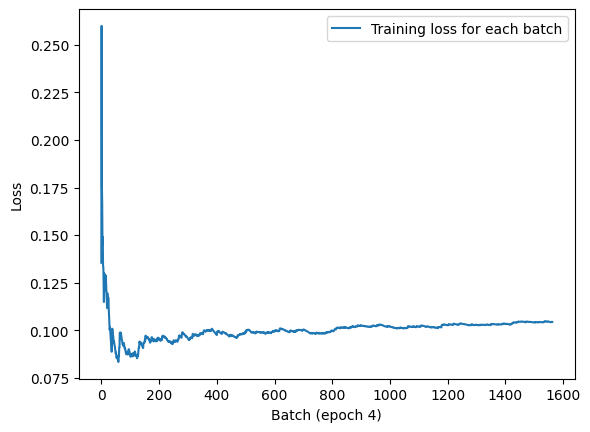

In [ ]:
model = get_mnist_model()

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    train_images, train_labels,
    epochs=5,
    callbacks=[LossHistory()],  # onze eigen callback meegeven
    validation_data=(val_images, val_labels)
)

In [ ]:
sorted([name for name in os.listdir() if name.startswith("plot_at_epoch")])

['plot_at_epoch_0.png',
 'plot_at_epoch_1.png',
 'plot_at_epoch_2.png',
 'plot_at_epoch_3.png',
 'plot_at_epoch_4.png']

### 7.3.4. Monitoring and visualization with TensorBoard

In [ ]:
os.getcwd()

'/content'

In [ ]:
model = get_mnist_model()

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

tensorboard = keras.callbacks.TensorBoard(
    log_dir=os.getcwd(),
)

model.fit(
    train_images,
    train_labels,
    epochs=5,
    validation_data=(val_images, val_labels),
    callbacks=[tensorboard]  # tensorboard callback meegeven
)

Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2978 - accuracy: 0.9120 - val_loss: 0.1522 - val_accuracy: 0.9553
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1602 - accuracy: 0.9539 - val_loss: 0.1156 - val_accuracy: 0.9695
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1327 - accuracy: 0.9637 - val_loss: 0.1051 - val_accuracy: 0.9722
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1139 - accuracy: 0.9681 - val_loss: 0.0998 - val_accuracy: 0.9748
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1018 - accuracy: 0.9721 - val_loss: 0.1045 - val_accuracy: 0.9746


In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content

### OPDRACHT

Laat de `fit` methode loss en accuracy real-time plotten (ipv printen) voor zowel training- (blauw) als validatieset (rood).